# 다차원 텐서 (다차원 배열)

In [7]:
import numpy as np

### 다차원 배열의 계산 복습

In [8]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])

print(A + B) # 단순 합 : (2, 3) 형태로 반환

vec = np.array([1, 2, 3])  # (3, ) 브로드캐스팅 연산 진행
print(A + vec) # (2, 3) 

print(A.dot(B.T))  # 점곱(내적) with 전치
                   # A.dot(B) = valueError : shape이 안맞기 때문에 에러 / 앞의 열과 뒤의 행의 갯수가 맞아야 가능함. (shape 은 (앞의 행, 뒤의 열) 형태로 반환)
                   # 그림 그려서 이해하기 (행, 열)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


250801

### 다층 퍼셉트론

In [ ]:
### 다층 퍼셉트론에 대한 형태 확인. 
X = np.random.randn(6, 10)

# 은닉층: 10개의 입력을 받아 8개의 뉴런으로 전달
w1 = np.random.randn(10, 8)   # 가중치
b1 = np.random.randn(1, 8)    # 편향

# 출력층: 8개의 입력을 받아 4개의 클래스로 반환
W2 = np.random.randn(8, 4)
b2 = np.random.randn(1, 4)

# 은닉층 계산(선형 계산(가중치*입력값 + 편향) + tanh 활성화 함수)
z1 = np.dot(X, w1) + b1
result1 = np.tanh(z1)

# 출력층 계산(선형 계산 + softmax 활성화 함수)
z2 = np.dot(result1, W2) + b2
exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True))  # np에는 소프트맥스 함수가 없어서 직접 식 계산 (강의 내용 확인 필요)
result2 = exp_z / np.sum(exp_z, axis=1, keepdims=True)

print(result2) 

[[2.50957610e-01 6.97852987e-01 6.59232623e-03 4.45970771e-02]
 [1.66994884e-03 8.52643557e-04 9.76598412e-01 2.08789961e-02]
 [2.44367766e-02 7.87123389e-03 5.80661695e-01 3.87030295e-01]
 [1.18177327e-01 2.19768819e-03 3.31215229e-01 5.48409756e-01]
 [5.30673651e-01 1.21288697e-01 1.67268090e-01 1.80769562e-01]
 [2.04486087e-03 4.37542044e-03 9.26336803e-01 6.72429161e-02]]


### 이미지 데이터 예시

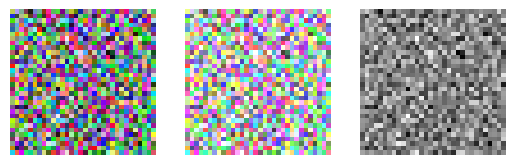

In [ ]:
import matplotlib.pyplot as plt

# 이미지 생성
batch_size = 5   
channels = 3
height = 32
width = 32

images = np.random.rand(batch_size, channels, height, width)

bright_images = np.clip(images + 0.2, 0, 1)  # 밝기를 억제함.

gray_images = np.mean(images, axis=1)        # channels 를 기준으로 더해서 나눔 = 1 (흑백으로 변환)

images_for_display = images[0].transpose(1, 2, 0)
bright_images_for_display = bright_images[0].transpose(1, 2, 0)

plt.subplot(1, 3, 1)
plt.imshow(images_for_display)  # 숫자값을 기준으로 컬러 반환
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bright_images_for_display)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_images[0], cmap='gray')  # 실제 값이 흑백일 경우, gray 명시하기 (기본값이 컬러)
plt.axis('off')

plt.show()
